In [27]:
#Модули
#!pip install catboost

import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [28]:
#Подрубаем датасет
df = pd.read_csv('train_dataset_train.csv', sep=',')


In [29]:
#df.head(5)
#df.dtypes
#print(df.shape)

df.sample(5)


,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
264406,264407,A5963D9713F8C8597F1DC7FDB77DFDF7,КОШЕЛЕК,410,Печатники,10016,Печатники,10,Люблинско-Дмитровская,2022-09-13 08:47:18,603.233333,10009
346090,346091,8A2BA1B22656530CF7B0EF4328743311,90 дней,410,Печатники,10016,Печатники,10,Люблинско-Дмитровская,2022-09-14 06:12:21,704.350000,2022
826547,826548,2B79B8B6078828F4A08B3B3F6A45CC7B,Социальная карта москвича,303,Кузьминки (Восточный),7009,Кузьминки,7,Таганско-Краснопресненская,2022-09-16 16:39:41,81.566667,6006
797874,797875,E76CA9C30818ED4C6E5D665CE3F2FB53,КОШЕЛЕК,153,Щёлковская ( Северный ),3022,Щёлковская,3,Арбатско-Покровская,2022-09-16 10:37:46,307.316667,81013
122925,122926,E360EAE68F986BC4C474FD59351B8D65,30 дней Пригород ТК,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 10:02:44,492.383333,3015


In [30]:
#df.line_id.describe()

#df.ticket_id.nunique() - len(df.ticket_id) -> по несколько раз ездят одни и те же

#df.isnull().sum() #-> нет пропусков все окей

#df["ticket_type_nm"].value_counts() -> посмотреть на типы и количество билетов


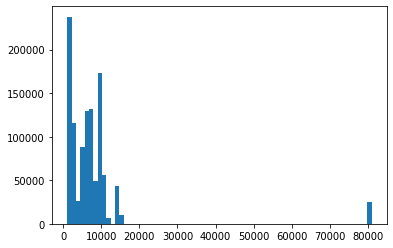

In [31]:
df["label"].hist(grid = 0, bins = 70) #Гистограмма кол-ва станций

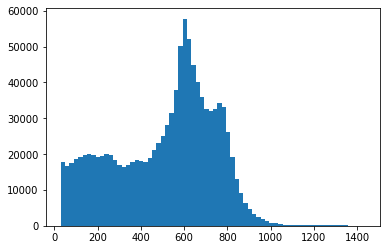

In [32]:
df["time_to_under"].hist(grid = 0, bins = 70) #График времени (с)

In [33]:
df["day"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df["hour"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))
df["minute"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[1])) #опционально



In [34]:
df = df.drop(['id', 'entrance_nm', 'station_nm', 'pass_dttm', 'line_nm', 'entrance_nm'], axis=1)
#df = df.drop(['id', 'ticket_id', 'entrance_id', 'station_id', 'line_id', 'entrance_nm'], axis=1)

In [35]:
df.sample(3)

,ticket_id,ticket_type_nm,entrance_id,station_id,line_id,time_to_under,label,day,hour,minute
385165,D4A535F6153EB11F483D7A058E8BB529,30 дней Пригород,2068,3003,3,641.283333,3018,14,7,40
48817,0B183C596EABAD45EEDA8C923655DDE7,365 дней ЕДИНЫЙ ТК,2263,15002,15,803.033333,7009,12,7,45
292923,76CA867DAA15C3A94AC7F1F6128D3730,Социальная карта москвича,415,10011,10,427.266667,10017,13,9,58


In [36]:

le_type = preprocessing.LabelEncoder()
le_id = preprocessing.LabelEncoder()
le_type.fit(df["ticket_type_nm"])
le_id.fit(df["ticket_id"])


df["ticket_id"] = le_id.transform(df["ticket_id"])
df["ticket_type_nm"] = le_type.transform(df["ticket_type_nm"])


In [37]:
df.sample(3)

,ticket_id,ticket_type_nm,entrance_id,station_id,line_id,time_to_under,label,day,hour,minute
506997,210946,40,2086,10001,10,40.716667,10001,15,0,15
451649,7945,38,1006,9005,9,685.733333,6023,14,9,28
206335,169441,20,205,5009,5,950.916667,6023,13,7,24


In [52]:
#Тренировочный и тестовый датасет 

#регрессия

X = df.drop(['time_to_under', 'label'], axis = 1)
y = df['time_to_under']

X_train_for_regression, X_validation_for_regression, y_train_for_regression, y_validation_for_regression = train_test_split(X, y, test_size = 0.2)
#X_train_for_regression, X_test_for_regression, y_train_for_regression, y_test_for_regression = train_test_split(X_test_for_regression, y_test_for_regression, test_size = 0.3)

#Классификация

X2 = df.drop(['time_to_under', 'label'], axis = 1)
y2 = df['label']

X_train_for_classification, X_validation_for_classification, y_train_for_classification, y_validation_for_classification = train_test_split(X2, y2, test_size = 0.1)
X_train_for_classification, X_validation_for_classification, y_train_for_classification, y_validation_for_classification = train_test_split(X_validation_for_classification, y_validation_for_classification, test_size = 0.3)



In [53]:

y_validation_for_classification



499216     81014
930944      1019
257930      8006
1022023    10007
327126      6010
           ...  
317820      1022
457348      1016
676470      6022
705712      9017
402543     10011
Name: label, Length: 32731, dtype: int64

In [54]:
y_train_for_classification


729277      9020
814991      7015
673371      7021
412373     14021
695872      7002
           ...  
72474       3008
1071534     3015
92784       3022
1006101     2008
329335      9015
Name: label, Length: 76372, dtype: int64

In [41]:
model_reg = CatBoostRegressor(iterations = 1300, depth = 6)
model_reg.fit(X_train_for_regression, y_train_for_regression,
              #cat_features=['ticket_id','ticket_type_nm'],
              eval_set = (X_validation_for_regression, y_validation_for_regression)
             )

Learning rate set to 0.125636
0:	learn: 219.0084172	test: 219.1606057	best: 219.1606057 (0)	total: 53.8ms	remaining: 1m 9s
1:	learn: 207.7925168	test: 207.9490275	best: 207.9490275 (1)	total: 105ms	remaining: 1m 8s
2:	learn: 198.7019033	test: 198.8736800	best: 198.8736800 (2)	total: 158ms	remaining: 1m 8s
3:	learn: 191.3354574	test: 191.5197633	best: 191.5197633 (3)	total: 206ms	remaining: 1m 6s
4:	learn: 185.3130122	test: 185.5100183	best: 185.5100183 (4)	total: 255ms	remaining: 1m 6s
5:	learn: 180.5035519	test: 180.7140587	best: 180.7140587 (5)	total: 306ms	remaining: 1m 5s
6:	learn: 176.6398628	test: 176.8552770	best: 176.8552770 (6)	total: 353ms	remaining: 1m 5s
7:	learn: 173.5416083	test: 173.7642655	best: 173.7642655 (7)	total: 403ms	remaining: 1m 5s
8:	learn: 171.1020362	test: 171.3310583	best: 171.3310583 (8)	total: 453ms	remaining: 1m 4s
9:	learn: 169.1584995	test: 169.3965248	best: 169.3965248 (9)	total: 499ms	remaining: 1m 4s
10:	learn: 167.5764516	test: 167.8028772	best: 16

89:	learn: 159.1834962	test: 159.3490642	best: 159.3490642 (89)	total: 4.1s	remaining: 55.1s
90:	learn: 159.1777041	test: 159.3441687	best: 159.3441687 (90)	total: 4.15s	remaining: 55.1s
91:	learn: 159.1706501	test: 159.3373870	best: 159.3373870 (91)	total: 4.2s	remaining: 55.1s
92:	learn: 159.1589749	test: 159.3261319	best: 159.3261319 (92)	total: 4.24s	remaining: 55.1s
93:	learn: 159.1491944	test: 159.3178848	best: 159.3178848 (93)	total: 4.29s	remaining: 55s
94:	learn: 159.1427608	test: 159.3125565	best: 159.3125565 (94)	total: 4.33s	remaining: 55s
95:	learn: 159.1329224	test: 159.3025232	best: 159.3025232 (95)	total: 4.38s	remaining: 54.9s
96:	learn: 159.1267140	test: 159.2960937	best: 159.2960937 (96)	total: 4.43s	remaining: 54.9s
97:	learn: 159.1179229	test: 159.2866419	best: 159.2866419 (97)	total: 4.47s	remaining: 54.9s
98:	learn: 159.1077373	test: 159.2783450	best: 159.2783450 (98)	total: 4.52s	remaining: 54.9s
99:	learn: 159.0965099	test: 159.2700321	best: 159.2700321 (99)	to

176:	learn: 158.6061119	test: 158.8594025	best: 158.8594025 (176)	total: 8.22s	remaining: 52.2s
177:	learn: 158.6014762	test: 158.8564611	best: 158.8564611 (177)	total: 8.27s	remaining: 52.1s
178:	learn: 158.5954342	test: 158.8490357	best: 158.8490357 (178)	total: 8.31s	remaining: 52.1s
179:	learn: 158.5906052	test: 158.8463446	best: 158.8463446 (179)	total: 8.36s	remaining: 52s
180:	learn: 158.5881799	test: 158.8454238	best: 158.8454238 (180)	total: 8.4s	remaining: 52s
181:	learn: 158.5867637	test: 158.8452129	best: 158.8452129 (181)	total: 8.44s	remaining: 51.9s
182:	learn: 158.5826687	test: 158.8435061	best: 158.8435061 (182)	total: 8.49s	remaining: 51.8s
183:	learn: 158.5805738	test: 158.8419782	best: 158.8419782 (183)	total: 8.54s	remaining: 51.8s
184:	learn: 158.5761758	test: 158.8394138	best: 158.8394138 (184)	total: 8.58s	remaining: 51.7s
185:	learn: 158.5682581	test: 158.8310327	best: 158.8310327 (185)	total: 8.62s	remaining: 51.7s
186:	learn: 158.5646928	test: 158.8288506	bes

264:	learn: 158.2713315	test: 158.6405440	best: 158.6405440 (264)	total: 12.4s	remaining: 48.6s
265:	learn: 158.2689236	test: 158.6405512	best: 158.6405440 (264)	total: 12.5s	remaining: 48.5s
266:	learn: 158.2658761	test: 158.6379585	best: 158.6379585 (266)	total: 12.5s	remaining: 48.4s
267:	learn: 158.2624587	test: 158.6347844	best: 158.6347844 (267)	total: 12.6s	remaining: 48.4s
268:	learn: 158.2591019	test: 158.6323315	best: 158.6323315 (268)	total: 12.6s	remaining: 48.3s
269:	learn: 158.2544857	test: 158.6267603	best: 158.6267603 (269)	total: 12.7s	remaining: 48.3s
270:	learn: 158.2533833	test: 158.6266795	best: 158.6266795 (270)	total: 12.7s	remaining: 48.2s
271:	learn: 158.2499738	test: 158.6257777	best: 158.6257777 (271)	total: 12.7s	remaining: 48.2s
272:	learn: 158.2473356	test: 158.6239586	best: 158.6239586 (272)	total: 12.8s	remaining: 48.1s
273:	learn: 158.2452387	test: 158.6232638	best: 158.6232638 (273)	total: 12.8s	remaining: 48s
274:	learn: 158.2419784	test: 158.6219683	

353:	learn: 158.0176122	test: 158.5011233	best: 158.5011233 (353)	total: 16.7s	remaining: 44.5s
354:	learn: 158.0158881	test: 158.5006822	best: 158.5006822 (354)	total: 16.7s	remaining: 44.4s
355:	learn: 158.0133885	test: 158.4998062	best: 158.4998062 (355)	total: 16.7s	remaining: 44.4s
356:	learn: 158.0114766	test: 158.4985888	best: 158.4985888 (356)	total: 16.8s	remaining: 44.3s
357:	learn: 158.0082267	test: 158.4973958	best: 158.4973958 (357)	total: 16.8s	remaining: 44.3s
358:	learn: 158.0061253	test: 158.4959205	best: 158.4959205 (358)	total: 16.9s	remaining: 44.2s
359:	learn: 158.0033668	test: 158.4950626	best: 158.4950626 (359)	total: 16.9s	remaining: 44.2s
360:	learn: 158.0000003	test: 158.4927224	best: 158.4927224 (360)	total: 17s	remaining: 44.1s
361:	learn: 157.9977657	test: 158.4922073	best: 158.4922073 (361)	total: 17s	remaining: 44.1s
362:	learn: 157.9948661	test: 158.4901141	best: 158.4901141 (362)	total: 17s	remaining: 44s
363:	learn: 157.9924457	test: 158.4901516	best: 

440:	learn: 157.8098842	test: 158.4218448	best: 158.4218448 (440)	total: 21s	remaining: 40.9s
441:	learn: 157.8082562	test: 158.4216257	best: 158.4216257 (441)	total: 21s	remaining: 40.8s
442:	learn: 157.8072200	test: 158.4214111	best: 158.4214111 (442)	total: 21.1s	remaining: 40.8s
443:	learn: 157.8053939	test: 158.4213978	best: 158.4213978 (443)	total: 21.1s	remaining: 40.7s
444:	learn: 157.8037892	test: 158.4206196	best: 158.4206196 (444)	total: 21.2s	remaining: 40.7s
445:	learn: 157.8018256	test: 158.4196861	best: 158.4196861 (445)	total: 21.2s	remaining: 40.6s
446:	learn: 157.7997167	test: 158.4197133	best: 158.4196861 (445)	total: 21.3s	remaining: 40.6s
447:	learn: 157.7964203	test: 158.4163725	best: 158.4163725 (447)	total: 21.3s	remaining: 40.6s
448:	learn: 157.7949742	test: 158.4157214	best: 158.4157214 (448)	total: 21.4s	remaining: 40.5s
449:	learn: 157.7930419	test: 158.4146357	best: 158.4146357 (449)	total: 21.4s	remaining: 40.4s
450:	learn: 157.7906848	test: 158.4152082	be

530:	learn: 157.6151467	test: 158.3384148	best: 158.3384148 (530)	total: 25.1s	remaining: 36.4s
531:	learn: 157.6131799	test: 158.3375614	best: 158.3375614 (531)	total: 25.2s	remaining: 36.3s
532:	learn: 157.6116778	test: 158.3374185	best: 158.3374185 (532)	total: 25.2s	remaining: 36.3s
533:	learn: 157.6091535	test: 158.3369985	best: 158.3369985 (533)	total: 25.2s	remaining: 36.2s
534:	learn: 157.6058935	test: 158.3351227	best: 158.3351227 (534)	total: 25.3s	remaining: 36.2s
535:	learn: 157.6037775	test: 158.3335731	best: 158.3335731 (535)	total: 25.4s	remaining: 36.1s
536:	learn: 157.6020700	test: 158.3340159	best: 158.3335731 (535)	total: 25.4s	remaining: 36.1s
537:	learn: 157.6003205	test: 158.3336066	best: 158.3335731 (535)	total: 25.4s	remaining: 36s
538:	learn: 157.5989581	test: 158.3341344	best: 158.3335731 (535)	total: 25.5s	remaining: 36s
539:	learn: 157.5967506	test: 158.3331742	best: 158.3331742 (539)	total: 25.5s	remaining: 35.9s
540:	learn: 157.5945899	test: 158.3317377	be

618:	learn: 157.4487782	test: 158.2870698	best: 158.2870698 (618)	total: 29.2s	remaining: 32.2s
619:	learn: 157.4471989	test: 158.2864283	best: 158.2864283 (619)	total: 29.3s	remaining: 32.1s
620:	learn: 157.4455589	test: 158.2871750	best: 158.2864283 (619)	total: 29.3s	remaining: 32.1s
621:	learn: 157.4438406	test: 158.2863026	best: 158.2863026 (621)	total: 29.4s	remaining: 32s
622:	learn: 157.4422854	test: 158.2846523	best: 158.2846523 (622)	total: 29.4s	remaining: 32s
623:	learn: 157.4409860	test: 158.2851801	best: 158.2846523 (622)	total: 29.5s	remaining: 31.9s
624:	learn: 157.4386605	test: 158.2843766	best: 158.2843766 (624)	total: 29.5s	remaining: 31.9s
625:	learn: 157.4362183	test: 158.2847000	best: 158.2843766 (624)	total: 29.6s	remaining: 31.8s
626:	learn: 157.4346533	test: 158.2847967	best: 158.2843766 (624)	total: 29.6s	remaining: 31.8s
627:	learn: 157.4329467	test: 158.2851639	best: 158.2843766 (624)	total: 29.7s	remaining: 31.7s
628:	learn: 157.4315095	test: 158.2850919	be

706:	learn: 157.2909046	test: 158.2392929	best: 158.2389128 (705)	total: 33.7s	remaining: 28.3s
707:	learn: 157.2894702	test: 158.2392283	best: 158.2389128 (705)	total: 33.8s	remaining: 28.2s
708:	learn: 157.2864142	test: 158.2386570	best: 158.2386570 (708)	total: 33.8s	remaining: 28.2s
709:	learn: 157.2844770	test: 158.2379332	best: 158.2379332 (709)	total: 33.9s	remaining: 28.1s
710:	learn: 157.2829944	test: 158.2369827	best: 158.2369827 (710)	total: 33.9s	remaining: 28.1s
711:	learn: 157.2823983	test: 158.2367108	best: 158.2367108 (711)	total: 34s	remaining: 28s
712:	learn: 157.2805839	test: 158.2358385	best: 158.2358385 (712)	total: 34s	remaining: 28s
713:	learn: 157.2781258	test: 158.2358524	best: 158.2358385 (712)	total: 34.1s	remaining: 28s
714:	learn: 157.2762290	test: 158.2352871	best: 158.2352871 (714)	total: 34.1s	remaining: 27.9s
715:	learn: 157.2746388	test: 158.2360945	best: 158.2352871 (714)	total: 34.2s	remaining: 27.9s
716:	learn: 157.2727699	test: 158.2345624	best: 15

793:	learn: 157.1359505	test: 158.1836460	best: 158.1836460 (793)	total: 38.2s	remaining: 24.3s
794:	learn: 157.1334742	test: 158.1824380	best: 158.1824380 (794)	total: 38.2s	remaining: 24.3s
795:	learn: 157.1313518	test: 158.1819563	best: 158.1819563 (795)	total: 38.3s	remaining: 24.2s
796:	learn: 157.1286686	test: 158.1807673	best: 158.1807673 (796)	total: 38.3s	remaining: 24.2s
797:	learn: 157.1271137	test: 158.1797362	best: 158.1797362 (797)	total: 38.4s	remaining: 24.1s
798:	learn: 157.1258056	test: 158.1792879	best: 158.1792879 (798)	total: 38.4s	remaining: 24.1s
799:	learn: 157.1240097	test: 158.1784742	best: 158.1784742 (799)	total: 38.4s	remaining: 24s
800:	learn: 157.1225442	test: 158.1785426	best: 158.1784742 (799)	total: 38.5s	remaining: 24s
801:	learn: 157.1201995	test: 158.1790257	best: 158.1784742 (799)	total: 38.5s	remaining: 23.9s
802:	learn: 157.1190672	test: 158.1790575	best: 158.1784742 (799)	total: 38.6s	remaining: 23.9s
803:	learn: 157.1173261	test: 158.1785796	be

880:	learn: 156.9858051	test: 158.1435150	best: 158.1435150 (880)	total: 42.4s	remaining: 20.2s
881:	learn: 156.9839095	test: 158.1432427	best: 158.1432427 (881)	total: 42.5s	remaining: 20.1s
882:	learn: 156.9828170	test: 158.1430580	best: 158.1430580 (882)	total: 42.5s	remaining: 20.1s
883:	learn: 156.9815516	test: 158.1428788	best: 158.1428788 (883)	total: 42.5s	remaining: 20s
884:	learn: 156.9792277	test: 158.1421960	best: 158.1421960 (884)	total: 42.6s	remaining: 20s
885:	learn: 156.9774438	test: 158.1425679	best: 158.1421960 (884)	total: 42.7s	remaining: 19.9s
886:	learn: 156.9754323	test: 158.1418415	best: 158.1418415 (886)	total: 42.7s	remaining: 19.9s
887:	learn: 156.9740451	test: 158.1419652	best: 158.1418415 (886)	total: 42.8s	remaining: 19.8s
888:	learn: 156.9725594	test: 158.1414790	best: 158.1414790 (888)	total: 42.8s	remaining: 19.8s
889:	learn: 156.9711145	test: 158.1407198	best: 158.1407198 (889)	total: 42.9s	remaining: 19.7s
890:	learn: 156.9689550	test: 158.1427507	be

968:	learn: 156.8438781	test: 158.1092119	best: 158.1092119 (968)	total: 46.7s	remaining: 16s
969:	learn: 156.8423322	test: 158.1087477	best: 158.1087477 (969)	total: 46.8s	remaining: 15.9s
970:	learn: 156.8402618	test: 158.1057729	best: 158.1057729 (970)	total: 46.8s	remaining: 15.9s
971:	learn: 156.8388319	test: 158.1056084	best: 158.1056084 (971)	total: 46.9s	remaining: 15.8s
972:	learn: 156.8380460	test: 158.1061960	best: 158.1056084 (971)	total: 46.9s	remaining: 15.8s
973:	learn: 156.8366853	test: 158.1058797	best: 158.1056084 (971)	total: 47s	remaining: 15.7s
974:	learn: 156.8350512	test: 158.1052995	best: 158.1052995 (974)	total: 47s	remaining: 15.7s
975:	learn: 156.8336113	test: 158.1042655	best: 158.1042655 (975)	total: 47.1s	remaining: 15.6s
976:	learn: 156.8319387	test: 158.1035944	best: 158.1035944 (976)	total: 47.1s	remaining: 15.6s
977:	learn: 156.8302760	test: 158.1013925	best: 158.1013925 (977)	total: 47.1s	remaining: 15.5s
978:	learn: 156.8291504	test: 158.1013400	best

1056:	learn: 156.7062163	test: 158.0698814	best: 158.0695330 (1055)	total: 51s	remaining: 11.7s
1057:	learn: 156.7044102	test: 158.0689668	best: 158.0689668 (1057)	total: 51.1s	remaining: 11.7s
1058:	learn: 156.7029428	test: 158.0685473	best: 158.0685473 (1058)	total: 51.1s	remaining: 11.6s
1059:	learn: 156.7007824	test: 158.0678872	best: 158.0678872 (1059)	total: 51.2s	remaining: 11.6s
1060:	learn: 156.7000294	test: 158.0680329	best: 158.0678872 (1059)	total: 51.2s	remaining: 11.5s
1061:	learn: 156.6988233	test: 158.0674664	best: 158.0674664 (1061)	total: 51.3s	remaining: 11.5s
1062:	learn: 156.6970359	test: 158.0662074	best: 158.0662074 (1062)	total: 51.3s	remaining: 11.4s
1063:	learn: 156.6949123	test: 158.0652162	best: 158.0652162 (1063)	total: 51.4s	remaining: 11.4s
1064:	learn: 156.6928190	test: 158.0659352	best: 158.0652162 (1063)	total: 51.4s	remaining: 11.3s
1065:	learn: 156.6903306	test: 158.0650330	best: 158.0650330 (1065)	total: 51.5s	remaining: 11.3s
1066:	learn: 156.68858

1143:	learn: 156.5808161	test: 158.0352029	best: 158.0352029 (1143)	total: 55.3s	remaining: 7.53s
1144:	learn: 156.5794691	test: 158.0347773	best: 158.0347773 (1144)	total: 55.3s	remaining: 7.49s
1145:	learn: 156.5785158	test: 158.0342242	best: 158.0342242 (1145)	total: 55.3s	remaining: 7.44s
1146:	learn: 156.5768776	test: 158.0337355	best: 158.0337355 (1146)	total: 55.4s	remaining: 7.39s
1147:	learn: 156.5746079	test: 158.0319044	best: 158.0319044 (1147)	total: 55.4s	remaining: 7.34s
1148:	learn: 156.5734920	test: 158.0312616	best: 158.0312616 (1148)	total: 55.5s	remaining: 7.29s
1149:	learn: 156.5720483	test: 158.0301438	best: 158.0301438 (1149)	total: 55.5s	remaining: 7.25s
1150:	learn: 156.5706282	test: 158.0294873	best: 158.0294873 (1150)	total: 55.6s	remaining: 7.2s
1151:	learn: 156.5691837	test: 158.0286493	best: 158.0286493 (1151)	total: 55.6s	remaining: 7.15s
1152:	learn: 156.5679470	test: 158.0288979	best: 158.0286493 (1151)	total: 55.7s	remaining: 7.1s
1153:	learn: 156.56648

1227:	learn: 156.4651170	test: 158.0038632	best: 158.0038632 (1227)	total: 59.4s	remaining: 3.48s
1228:	learn: 156.4632135	test: 158.0039655	best: 158.0038632 (1227)	total: 59.4s	remaining: 3.43s
1229:	learn: 156.4621029	test: 158.0041069	best: 158.0038632 (1227)	total: 59.5s	remaining: 3.38s
1230:	learn: 156.4608072	test: 158.0035640	best: 158.0035640 (1230)	total: 59.5s	remaining: 3.34s
1231:	learn: 156.4591152	test: 158.0035035	best: 158.0035035 (1231)	total: 59.6s	remaining: 3.29s
1232:	learn: 156.4579651	test: 158.0029252	best: 158.0029252 (1232)	total: 59.6s	remaining: 3.24s
1233:	learn: 156.4567520	test: 158.0026707	best: 158.0026707 (1233)	total: 59.7s	remaining: 3.19s
1234:	learn: 156.4558492	test: 158.0023142	best: 158.0023142 (1234)	total: 59.7s	remaining: 3.14s
1235:	learn: 156.4541931	test: 158.0020698	best: 158.0020698 (1235)	total: 59.8s	remaining: 3.09s
1236:	learn: 156.4532240	test: 158.0016812	best: 158.0016812 (1236)	total: 59.8s	remaining: 3.05s
1237:	learn: 156.451

In [55]:
model_clf = CatBoostClassifier(iterations = 180, depth = 6)
model_clf.fit(X_train_for_classification, y_train_for_classification,
              #cat_features=['ticket_id','ticket_type_nm'],
              eval_set = (X_validation_for_classification, y_validation_for_classification)
             )

Learning rate set to 0.226711
0:	learn: 5.4339831	test: 5.4409475	best: 5.4409475 (0)	total: 3.18s	remaining: 9m 28s
1:	learn: 5.3187152	test: 5.3424666	best: 5.3424666 (1)	total: 6.49s	remaining: 9m 37s
2:	learn: 5.2458516	test: 5.2771417	best: 5.2771417 (2)	total: 9.5s	remaining: 9m 20s
3:	learn: 5.1841069	test: 5.2242783	best: 5.2242783 (3)	total: 12.6s	remaining: 9m 14s
4:	learn: 5.1422906	test: 5.2009738	best: 5.2009738 (4)	total: 16.2s	remaining: 9m 26s
5:	learn: 5.1024486	test: 5.1706212	best: 5.1706212 (5)	total: 19.5s	remaining: 9m 24s
6:	learn: 5.0592571	test: 5.1297031	best: 5.1297031 (6)	total: 21.9s	remaining: 9m 1s
7:	learn: 5.0269481	test: 5.1079360	best: 5.1079360 (7)	total: 25.2s	remaining: 9m 1s
8:	learn: 5.0010966	test: 5.0945492	best: 5.0945492 (8)	total: 28.3s	remaining: 8m 58s
9:	learn: 4.9794882	test: 5.0852043	best: 5.0852043 (9)	total: 31.6s	remaining: 8m 56s
10:	learn: 4.9586737	test: 5.0685985	best: 5.0685985 (10)	total: 34.2s	remaining: 8m 44s
11:	learn: 4.9

92:	learn: 4.3616142	test: 4.9758892	best: 4.9740387 (77)	total: 4m 37s	remaining: 4m 19s
93:	learn: 4.3579698	test: 4.9759797	best: 4.9740387 (77)	total: 4m 39s	remaining: 4m 16s
94:	learn: 4.3513418	test: 4.9755127	best: 4.9740387 (77)	total: 4m 43s	remaining: 4m 13s
95:	learn: 4.3454788	test: 4.9761006	best: 4.9740387 (77)	total: 4m 46s	remaining: 4m 10s
96:	learn: 4.3420352	test: 4.9748646	best: 4.9740387 (77)	total: 4m 48s	remaining: 4m 7s
97:	learn: 4.3391921	test: 4.9753293	best: 4.9740387 (77)	total: 4m 51s	remaining: 4m 3s
98:	learn: 4.3347123	test: 4.9750024	best: 4.9740387 (77)	total: 4m 54s	remaining: 4m 1s
99:	learn: 4.3305241	test: 4.9737032	best: 4.9737032 (99)	total: 4m 58s	remaining: 3m 58s
100:	learn: 4.3248673	test: 4.9738985	best: 4.9737032 (99)	total: 5m 1s	remaining: 3m 55s
101:	learn: 4.3204499	test: 4.9743482	best: 4.9737032 (99)	total: 5m 4s	remaining: 3m 52s
102:	learn: 4.3151301	test: 4.9750282	best: 4.9737032 (99)	total: 5m 7s	remaining: 3m 49s
103:	learn: 4

In [57]:
pred_reg = model_reg.predict(X_validation_for_regression)
pred_clf = model_clf.predict(X_validation_for_classification)



In [58]:
from sklearn.metrics import r2_score, recall_score
result = 0.5*r2_score(y_validation_for_regression, pred_reg) + 0.5*recall_score(y_validation_for_classification, pred_clf, average='micro')
print(result)

0.2966417824472437


0.5401524105232306